<a href="https://colab.research.google.com/github/zilioalberto/Machine_Learning_ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## IA — Machine Learning | ANN (Perceptron)
##Prof. Claudinei Dias (Ney)

##**Atividade:** Portas lógicas AND/OR com Perceptron (x₃ = -1 como viés)

## Alunos:
## Alberto Zilio
## Roni Pereira

In [2]:
# ===== PASSO 1: Setup do ambiente e dos dados (AND/OR) =====

import numpy as np

# Reprodutibilidade
rng = np.random.default_rng(42)

# Função de ativação degrau do Perceptron: retorna +1 se u >= 0, senão -1
def step(u: float) -> int:
    return 1 if u >= 0 else -1

# Cálculo de saída do perceptron para um único padrão x e pesos w
def perceptron_output(x: np.ndarray, w: np.ndarray) -> int:
    # x e w devem ter o mesmo tamanho (inclui o termo de viés na última posição)
    u = float(np.dot(w, x))
    return step(u)

# Avaliar acurácia (percentual de acertos) de um conjunto (X, y) dado um vetor de pesos w
def accuracy(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    preds = np.array([perceptron_output(x, w) for x in X])
    return (preds == y).mean()

# -----------------------------------------
# Dados das portas lógicas com codificação {-1, +1} e viés x3 = -1
# Formato: x = [x1, x2, x3], com x3 = -1 (viés)
# Saída desejada d em {-1, +1}

# Porta OR: saídas +1 exceto quando ambos -1
X_or = np.array([
    [ 1,  1, -1],
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1, -1]
], dtype=float)
y_or = np.array([+1, +1, +1, -1], dtype=int)

# Porta AND: +1 somente quando ambos +1
X_and = np.array([
    [ 1,  1, -1],
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1, -1]
], dtype=float)
y_and = np.array([+1, -1, -1, -1], dtype=int)

# Pesos iniciais (aleatórios) para começarmos o treinamento no próximo passo
w_init = rng.random(X_or.shape[1])  # 3 pesos (inclui peso do viés)
w_init


array([0.77395605, 0.43887844, 0.85859792])

In [3]:
# ===== PASSO 2: Treinamento do Perceptron (regra clássica) =====
from dataclasses import dataclass

@dataclass
class TrainLog:
    w: np.ndarray
    epoch: int
    errors: int
    acc: float

def perceptron_train(X: np.ndarray,
                     y: np.ndarray,
                     w0: np.ndarray | None = None,
                     eta: float = 1.0,
                     max_epochs: int = 100) -> tuple[np.ndarray, list[TrainLog]]:
    """
    Treina um perceptron binário com saídas em {-1, +1} e função degrau.
    Atualização clássica: se errou, w <- w + eta * d * x
    """
    n_features = X.shape[1]
    w = w0.copy() if w0 is not None else np.zeros(n_features, dtype=float)

    history: list[TrainLog] = []
    for epoch in range(1, max_epochs + 1):
        errors = 0

        # (opcional) embaralhar os padrões a cada epoch
        idx = np.random.permutation(len(X))
        for i in idx:
            x_i, d_i = X[i], y[i]
            y_i = perceptron_output(x_i, w)
            if y_i != d_i:
                # atualização apenas quando erra
                w = w + eta * d_i * x_i
                errors += 1

        acc_epoch = accuracy(X, y, w)
        history.append(TrainLog(w=w.copy(), epoch=epoch, errors=errors, acc=acc_epoch))

        # critério de parada: aprendeu tudo (0 erros)
        if errors == 0:
            break

    return w, history

def print_training_summary(name: str, w_final: np.ndarray, history: list[TrainLog], X: np.ndarray, y: np.ndarray):
    print(f"\n=== {name} ===")
    print(f"Épocas executadas: {history[-1].epoch}")
    print(f"Erros na última época: {history[-1].errors}")
    print(f"Acurácia final: {history[-1].acc:.3f}")
    print(f"Pesos finais (inclui viés): {w_final}")

    # Tabela previsões vs desejado
    preds = np.array([perceptron_output(x, w_final) for x in X])
    table = np.c_[X, y, preds]
    print("\n[x1, x2, x3=-1, d, ŷ]")
    for row in table:
        print(row.astype(int))

# -----------------------------------------
# 2A) Treinar na porta OR
w_or, hist_or = perceptron_train(X_or, y_or, w0=w_init, eta=1.0, max_epochs=50)
print_training_summary("PORTA OR", w_or, hist_or, X_or, y_or)

# 2B) Treinar na porta AND
# (reinicia dos mesmos pesos iniciais para comparar aprendizado)
w_and, hist_and = perceptron_train(X_and, y_and, w0=w_init, eta=1.0, max_epochs=50)
print_training_summary("PORTA AND", w_and, hist_and, X_and, y_and)

# Dicas de leitura do histórico:
# - hist_or[k].errors indica quantos padrões erraram na época k+1
# - hist_or[k].acc indica a acurácia na época k+1



=== PORTA OR ===
Épocas executadas: 2
Erros na última época: 0
Acurácia final: 1.000
Pesos finais (inclui viés): [ 0.77395605  0.43887844 -1.14140208]

[x1, x2, x3=-1, d, ŷ]
[ 1  1 -1  1  1]
[ 1 -1 -1  1  1]
[-1  1 -1  1  1]
[-1 -1 -1 -1 -1]

=== PORTA AND ===
Épocas executadas: 1
Erros na última época: 0
Acurácia final: 1.000
Pesos finais (inclui viés): [0.77395605 0.43887844 0.85859792]

[x1, x2, x3=-1, d, ŷ]
[ 1  1 -1  1  1]
[ 1 -1 -1 -1 -1]
[-1  1 -1 -1 -1]
[-1 -1 -1 -1 -1]


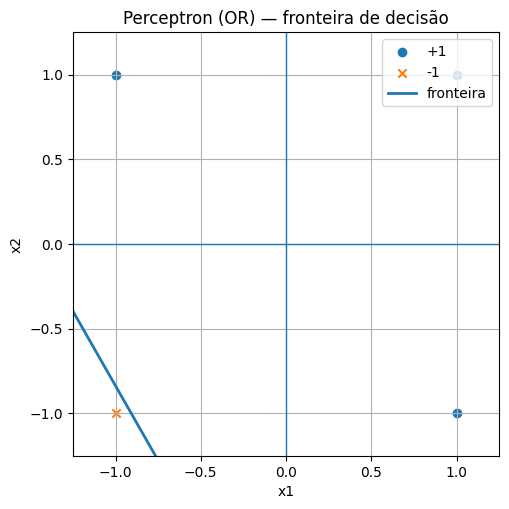


=== Interpretação automática — OR ===
Épocas: 2 | Erros na última época: 0 | Acurácia: 1.000
Pesos finais (w1, w2, w3[viés]): [ 0.77395605  0.43887844 -1.14140208]

Leitura dos pesos:
- w1 = +0.774: influencia o eixo x1 (positivo empurra decisão para classe +1 quando x1=+1).
- w2 = +0.439: influencia o eixo x2 (positivo empurra decisão para classe +1 quando x2=+1).
- w3 = -1.141: é o peso do viés para x3=-1. Se w3>0, o termo w3*(-1) desloca o limiar para valores mais negativos (tendendo a +1).

Tabela [x1 x2 | d | ŷ]:
[+1 +1]  d=+1  ŷ=+1
[+1 -1]  d=+1  ŷ=+1
[-1 +1]  d=+1  ŷ=+1
[-1 -1]  d=-1  ŷ=-1


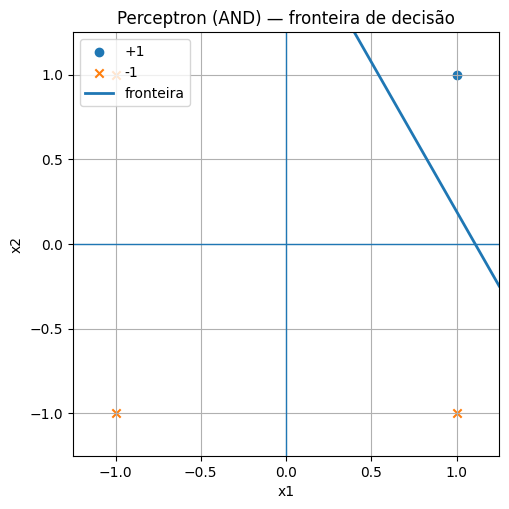


=== Interpretação automática — AND ===
Épocas: 1 | Erros na última época: 0 | Acurácia: 1.000
Pesos finais (w1, w2, w3[viés]): [0.77395605 0.43887844 0.85859792]

Leitura dos pesos:
- w1 = +0.774: influencia o eixo x1 (positivo empurra decisão para classe +1 quando x1=+1).
- w2 = +0.439: influencia o eixo x2 (positivo empurra decisão para classe +1 quando x2=+1).
- w3 = +0.859: é o peso do viés para x3=-1. Se w3>0, o termo w3*(-1) desloca o limiar para valores mais negativos (tendendo a +1).

Tabela [x1 x2 | d | ŷ]:
[+1 +1]  d=+1  ŷ=+1
[+1 -1]  d=-1  ŷ=-1
[-1 +1]  d=-1  ŷ=-1
[-1 -1]  d=-1  ŷ=-1


In [4]:
# ===== PASSO 3: Plotar fronteira de decisão e interpretar pesos/viés =====
import numpy as np
import matplotlib.pyplot as plt

def decision_boundary_xy(w, x_range=(-1.5, 1.5), num=200):
    """
    Para x3 = -1 fixo, a fronteira é w1*x1 + w2*x2 + w3*(-1) = 0
    => w1*x1 + w2*x2 - w3 = 0
    => x2 = (w3 - w1*x1)/w2   (se w2 != 0)
    """
    x1_vals = np.linspace(x_range[0], x_range[1], num)
    if abs(w[1]) < 1e-8:
        # fronteira quase vertical: w1*x1 - w3 = 0 => x1 = w3/w1
        x1_line = np.full_like(x1_vals, fill_value=(w[2]/w[0]))
        x2_vals = np.linspace(x_range[0], x_range[1], num)
        return x1_line, x2_vals, True  # vertical
    x2_vals = (w[2] - w[0]*x1_vals) / w[1]
    return x1_vals, x2_vals, False

def plot_dataset_and_boundary(X, y, w, title="Perceptron — fronteira"):
    # Separa classes
    X_pos = X[y == +1][:, :2]  # usa só x1,x2
    X_neg = X[y == -1][:, :2]

    # Plota pontos
    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(X_pos[:,0], X_pos[:,1], marker='o', label='+1')
    plt.scatter(X_neg[:,0], X_neg[:,1], marker='x', label='-1')

    # Fronteira
    x_line, y_line, vertical = decision_boundary_xy(w, x_range=(-1.25, 1.25))
    if vertical:
        plt.plot(x_line, y_line, linewidth=2, label='fronteira (vertical)')
    else:
        plt.plot(x_line, y_line, linewidth=2, label='fronteira')

    # Formatação
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    plt.axhline(0, linewidth=1)
    plt.axvline(0, linewidth=1)
    plt.legend()
    plt.grid(True)
    plt.show()

def auto_summary(name, w_final, history, X, y):
    print(f"\n=== Interpretação automática — {name} ===")
    print(f"Épocas: {history[-1].epoch} | Erros na última época: {history[-1].errors} | Acurácia: {history[-1].acc:.3f}")
    print(f"Pesos finais (w1, w2, w3[viés]): {w_final}")

    # Sinal e magnitude: como 'pesa' cada entrada
    w1, w2, w3 = w_final
    print("\nLeitura dos pesos:")
    print(f"- w1 = {w1:+.3f}: influencia o eixo x1 (positivo empurra decisão para classe +1 quando x1=+1).")
    print(f"- w2 = {w2:+.3f}: influencia o eixo x2 (positivo empurra decisão para classe +1 quando x2=+1).")
    print(f"- w3 = {w3:+.3f}: é o peso do viés para x3=-1. Se w3>0, o termo w3*(-1) desloca o limiar para valores mais negativos (tendendo a +1).")

    # Tabela d vs ŷ
    preds = np.array([perceptron_output(x, w_final) for x in X])
    print("\nTabela [x1 x2 | d | ŷ]:")
    for (x1, x2, _), d_i, y_i in zip(X, y, preds):
        print(f"[{int(x1):+d} {int(x2):+d}]  d={d_i:+d}  ŷ={y_i:+d}")

# ---- OR ----
plot_dataset_and_boundary(X_or, y_or, w_or, title="Perceptron (OR) — fronteira de decisão")
auto_summary("OR", w_or, hist_or, X_or, y_or)

# ---- AND ----
plot_dataset_and_boundary(X_and, y_and, w_and, title="Perceptron (AND) — fronteira de decisão")
auto_summary("AND", w_and, hist_and, X_and, y_and)



=== OR — eta=1.0, shuffle=True ===
Épocas: 2 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.774   0.4389 -1.1414]


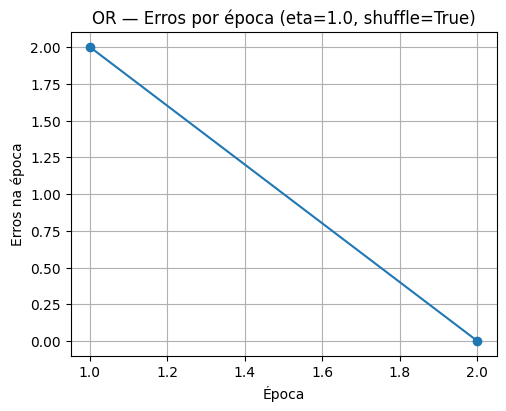


=== AND — eta=1.0, shuffle=True ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]


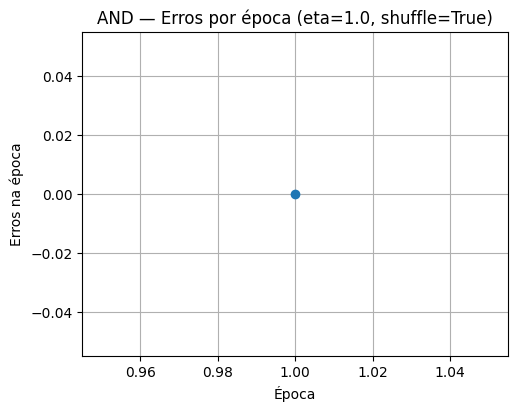


--- Variação de eta (OR) ---

=== OR — eta=0.1 ===
Épocas: 7 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.574   0.6389 -0.1414]

=== OR — eta=0.5 ===
Épocas: 4 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.774   0.4389 -1.1414]

=== OR — eta=1.0 ===
Épocas: 2 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.774   0.4389 -1.1414]

=== OR — eta=2.0 ===
Épocas: 3 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 2.774   2.4389 -1.1414]


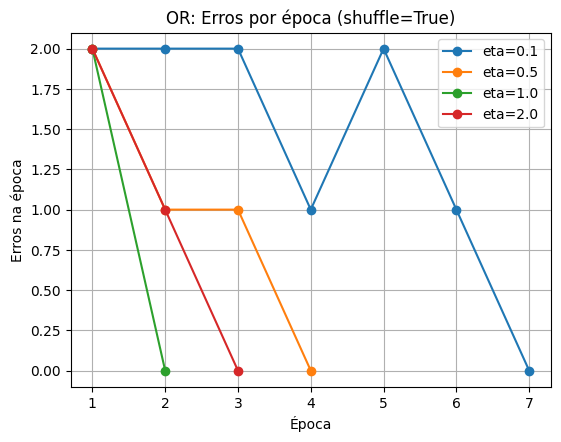


--- Variação de eta (AND) ---

=== AND — eta=0.1 ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]

=== AND — eta=0.5 ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]

=== AND — eta=1.0 ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]

=== AND — eta=2.0 ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]


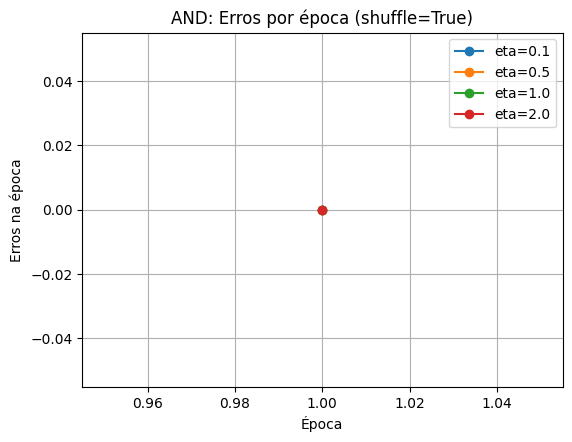


=== OR — shuffle=True ===
Épocas: 2 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.774   0.4389 -1.1414]

=== OR — shuffle=False ===
Épocas: 2 | Erros (última): 0 | Acurácia final: 1.000
w_final = [ 0.774   0.4389 -1.1414]


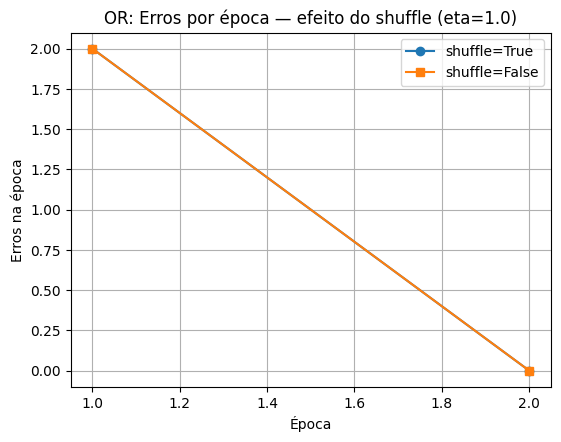


=== AND — shuffle=True ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]

=== AND — shuffle=False ===
Épocas: 1 | Erros (última): 0 | Acurácia final: 1.000
w_final = [0.774  0.4389 0.8586]


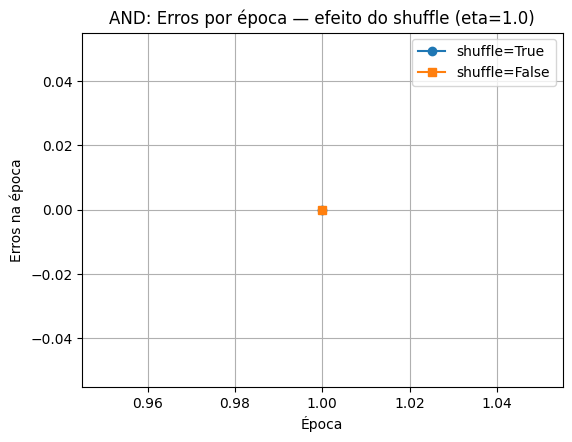

In [5]:
# ===== PASSO 4: Curvas de erro, variação de eta e impacto do shuffle =====
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# (Reusamos TrainLog, accuracy, perceptron_output do passo anterior)
# Vamos apenas criar uma versão com opção de embaralhar por época e que também retorna erros/época.

@dataclass
class TrainLog2:
    epoch: int
    errors: int
    acc: float

def perceptron_train_v2(X: np.ndarray,
                        y: np.ndarray,
                        w0: np.ndarray | None = None,
                        eta: float = 1.0,
                        max_epochs: int = 100,
                        shuffle_each_epoch: bool = True,
                        rng_seed: int | None = 42) -> tuple[np.ndarray, list[TrainLog2]]:
    """
    Treina o perceptron com opção de embaralhar (shuffle) a ordem dos padrões a cada época.
    Mantém a mesma regra: atualiza somente quando errar: w <- w + eta * d * x
    """
    if rng_seed is not None:
        np.random.seed(rng_seed)

    n_features = X.shape[1]
    w = (w0.copy() if w0 is not None else np.zeros(n_features, dtype=float))

    history: list[TrainLog2] = []
    for epoch in range(1, max_epochs + 1):
        if shuffle_each_epoch:
            idx = np.random.permutation(len(X))
        else:
            idx = np.arange(len(X))

        errors = 0
        for i in idx:
            x_i, d_i = X[i], y[i]
            y_i = 1 if np.dot(w, x_i) >= 0 else -1
            if y_i != d_i:
                w = w + eta * d_i * x_i
                errors += 1

        acc_epoch = (np.array([1 if np.dot(w, x) >= 0 else -1 for x in X]) == y).mean()
        history.append(TrainLog2(epoch=epoch, errors=errors, acc=acc_epoch))

        if errors == 0:
            break

    return w, history

def plot_errors(history, title="Erros por época"):
    plt.figure(figsize=(5.5, 4.2))
    plt.plot([h.epoch for h in history], [h.errors for h in history], marker='o')
    plt.title(title)
    plt.xlabel("Época")
    plt.ylabel("Erros na época")
    plt.grid(True)
    plt.show()

def summarize_run(name, w_final, history):
    print(f"\n=== {name} ===")
    print(f"Épocas: {history[-1].epoch} | Erros (última): {history[-1].errors} | Acurácia final: {history[-1].acc:.3f}")
    print(f"w_final = {np.round(w_final, 4)}")

# --------------------------
# 4A) Curva de erro padrão (eta=1.0, shuffle=True)
w_or_4a, hist_or_4a = perceptron_train_v2(X_or, y_or, w0=w_init, eta=1.0, max_epochs=50, shuffle_each_epoch=True, rng_seed=123)
w_and_4a, hist_and_4a = perceptron_train_v2(X_and, y_and, w0=w_init, eta=1.0, max_epochs=50, shuffle_each_epoch=True, rng_seed=123)

summarize_run("OR — eta=1.0, shuffle=True", w_or_4a, hist_or_4a)
plot_errors(hist_or_4a, title="OR — Erros por época (eta=1.0, shuffle=True)")

summarize_run("AND — eta=1.0, shuffle=True", w_and_4a, hist_and_4a)
plot_errors(hist_and_4a, title="AND — Erros por época (eta=1.0, shuffle=True)")

# --------------------------
# 4B) Comparar taxas de aprendizado (eta ∈ {0.1, 0.5, 1.0, 2.0}) com shuffle=True
etas = [0.1, 0.5, 1.0, 2.0]

def run_grid_etas(X, y, label, rng_seed=7):
    results = []
    for eta in etas:
        w_eta, hist_eta = perceptron_train_v2(X, y, w0=w_init, eta=eta, max_epochs=100, shuffle_each_epoch=True, rng_seed=rng_seed)
        results.append((eta, w_eta, hist_eta))
        summarize_run(f"{label} — eta={eta}", w_eta, hist_eta)
    # Plota curvas de erro para todas as etas
    plt.figure(figsize=(6.2, 4.6))
    for eta, _, hist_eta in results:
        plt.plot([h.epoch for h in hist_eta], [h.errors for h in hist_eta], marker='o', label=f"eta={eta}")
    plt.title(f"{label}: Erros por época (shuffle=True)")
    plt.xlabel("Época")
    plt.ylabel("Erros na época")
    plt.grid(True)
    plt.legend()
    plt.show()
    return results

print("\n--- Variação de eta (OR) ---")
grid_or = run_grid_etas(X_or, y_or, label="OR", rng_seed=2025)

print("\n--- Variação de eta (AND) ---")
grid_and = run_grid_etas(X_and, y_and, label="AND", rng_seed=2025)

# --------------------------
# 4C) Efeito do shuffle: comparar shuffle=True vs shuffle=False (eta fixo)
eta_test = 1.0

w_or_shuf,  hist_or_shuf  = perceptron_train_v2(X_or,  y_or,  w0=w_init, eta=eta_test, shuffle_each_epoch=True,  rng_seed=99)
w_or_no_sh, hist_or_no_sh = perceptron_train_v2(X_or,  y_or,  w0=w_init, eta=eta_test, shuffle_each_epoch=False, rng_seed=99)

w_and_shuf,  hist_and_shuf  = perceptron_train_v2(X_and, y_and, w0=w_init, eta=eta_test, shuffle_each_epoch=True,  rng_seed=99)
w_and_no_sh, hist_and_no_sh = perceptron_train_v2(X_and, y_and, w0=w_init, eta=eta_test, shuffle_each_epoch=False, rng_seed=99)

summarize_run("OR — shuffle=True",  w_or_shuf,  hist_or_shuf)
summarize_run("OR — shuffle=False", w_or_no_sh, hist_or_no_sh)
plt.figure(figsize=(6.2, 4.6))
plt.plot([h.epoch for h in hist_or_shuf],  [h.errors for h in hist_or_shuf],  marker='o', label='shuffle=True')
plt.plot([h.epoch for h in hist_or_no_sh], [h.errors for h in hist_or_no_sh], marker='s', label='shuffle=False')
plt.title("OR: Erros por época — efeito do shuffle (eta=1.0)")
plt.xlabel("Época")
plt.ylabel("Erros na época")
plt.grid(True)
plt.legend()
plt.show()

summarize_run("AND — shuffle=True",  w_and_shuf,  hist_and_shuf)
summarize_run("AND — shuffle=False", w_and_no_sh, hist_and_no_sh)
plt.figure(figsize=(6.2, 4.6))
plt.plot([h.epoch for h in hist_and_shuf],  [h.errors for h in hist_and_shuf],  marker='o', label='shuffle=True')
plt.plot([h.epoch for h in hist_and_no_sh], [h.errors for h in hist_and_no_sh], marker='s', label='shuffle=False')
plt.title("AND: Erros por época — efeito do shuffle (eta=1.0)")
plt.xlabel("Época")
plt.ylabel("Erros na época")
plt.grid(True)
plt.legend()
plt.show()



=== OR — Regra Delta ===
Épocas: 1000 | SSE final: 0.018310
w_final = [ 28.403805  28.403399 -28.403503]
Acurácia (sinal(o) vs d): 1.000
Tabela [x1 x2 | d | o | ŷ]:
[+1 +1]  d=+1  o=+1.000  ŷ=+1
[+1 -1]  d=+1  o=+0.890  ŷ=+1
[-1 +1]  d=+1  o=+0.890  ŷ=+1
[-1 -1]  d=-1  o=-0.890  ŷ=-1


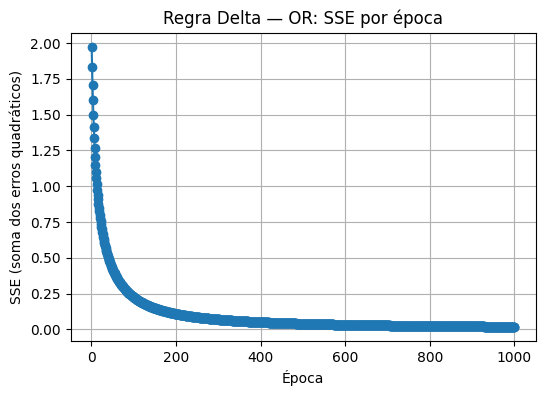


=== AND — Regra Delta ===
Épocas: 1000 | SSE final: 0.018288
w_final = [28.409855 28.410317 28.41012 ]
Acurácia (sinal(o) vs d): 1.000
Tabela [x1 x2 | d | o | ŷ]:
[+1 +1]  d=+1  o=+0.890  ŷ=+1
[+1 -1]  d=-1  o=-0.890  ŷ=-1
[-1 +1]  d=-1  o=-0.890  ŷ=-1
[-1 -1]  d=-1  o=-1.000  ŷ=-1


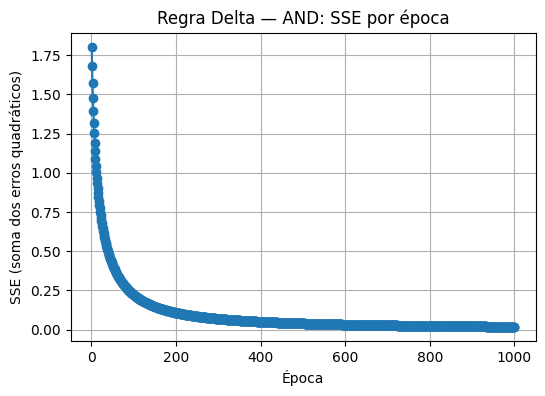

In [6]:
# ===== PASSO 5: Regra Delta (saída bipolar) para OR e AND =====
import numpy as np
import math
import matplotlib.pyplot as plt
from dataclasses import dataclass

# Ativação bipolar sugerida no enunciado: o = 2/(1+e^{-u}) - 1
def bipolar(u: float) -> float:
    return 2.0 / (1.0 + math.exp(-u)) - 1.0

# Derivada da bipolar em função da saída o (prático): bipolar'(u) = (1 - o^2)/2
def bipolar_prime_from_output(o: float) -> float:
    return (1.0 - o*o) / 2.0

@dataclass
class DeltaHistory:
    epoch: int
    sse: float  # soma dos erros quadráticos (0.5*(d-o)^2 acumulado)
    w: np.ndarray

def perceptron_delta_train(
    X: np.ndarray, y: np.ndarray,
    w0: np.ndarray | None = None,
    eta: float = 0.5,      # c no enunciado
    lamb: float = 0.10,    # ganho no potencial (u' = λ·u), como no enunciado
    d_error: float = 0.01, # alvo para SSE
    max_epochs: int = 500,
    shuffle_each_epoch: bool = True,
    rng_seed: int | None = 42
):
    if rng_seed is not None:
        np.random.seed(rng_seed)
    n_features = X.shape[1]
    w = (w0.copy() if w0 is not None else np.random.rand(n_features))
    hist: list[DeltaHistory] = []

    for epoch in range(1, max_epochs+1):
        idx = np.random.permutation(len(X)) if shuffle_each_epoch else np.arange(len(X))
        sse = 0.0

        for i in idx:
            x_i, d_i = X[i], float(y[i])
            u = float(np.dot(w, x_i))
            o = bipolar(lamb * u)
            # erro quadrático por padrão (0.5*(d-o)^2)
            sse += 0.5 * (d_i - o) ** 2.0

            # termo delta (do PDF): delta = (d - o) * (1 - o^2)/2
            delta = (d_i - o) * bipolar_prime_from_output(o)

            # atualização de pesos
            w = w + eta * delta * x_i

        hist.append(DeltaHistory(epoch=epoch, sse=sse, w=w.copy()))
        if sse < d_error:
            break
    return w, hist

def plot_sse(hist, title):
    plt.figure(figsize=(6,4))
    plt.plot([h.epoch for h in hist], [h.sse for h in hist], marker='o')
    plt.title(title)
    plt.xlabel("Época")
    plt.ylabel("SSE (soma dos erros quadráticos)")
    plt.grid(True)
    plt.show()

def summarize_delta(name, w, hist, X, y, lamb=0.10):
    print(f"\n=== {name} — Regra Delta ===")
    print(f"Épocas: {hist[-1].epoch} | SSE final: {hist[-1].sse:.6f}")
    print(f"w_final = {np.round(w, 6)}")
    # Predição por sinal da saída bipolar:
    o_vals = np.array([bipolar(lamb * float(np.dot(w, x))) for x in X])
    y_pred = np.where(o_vals >= 0.0, +1, -1)
    acc = (y_pred == y).mean()
    print(f"Acurácia (sinal(o) vs d): {acc:.3f}")
    print("Tabela [x1 x2 | d | o | ŷ]:")
    for (x1,x2,_), d_i, o_i, y_i in zip(X, y, o_vals, y_pred):
        print(f"[{int(x1):+d} {int(x2):+d}]  d={int(d_i):+d}  o={o_i:+.3f}  ŷ={int(y_i):+d}")

# Executa Delta para OR e AND (mesmos X_or/X_and e y_or/y_and do Passo 1)
w_or_delta,  hist_or_delta  = perceptron_delta_train(X_or,  y_or,  w0=w_init, eta=0.5, lamb=0.10, d_error=0.01, max_epochs=1000)
w_and_delta, hist_and_delta = perceptron_delta_train(X_and, y_and, w0=w_init, eta=0.5, lamb=0.10, d_error=0.01, max_epochs=1000)

summarize_delta("OR",  w_or_delta,  hist_or_delta,  X_or,  y_or)
plot_sse(hist_or_delta,  "Regra Delta — OR: SSE por época")

summarize_delta("AND", w_and_delta, hist_and_delta, X_and, y_and)
plot_sse(hist_and_delta, "Regra Delta — AND: SSE por época")



=== OR — sklearn Perceptron ===
Acurácia: 1.000
Matriz de confusão:
 [[1 0]
 [0 3]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

coef_ (w1, w2): [[1. 1.]]  | intercept_ (b): [1.]


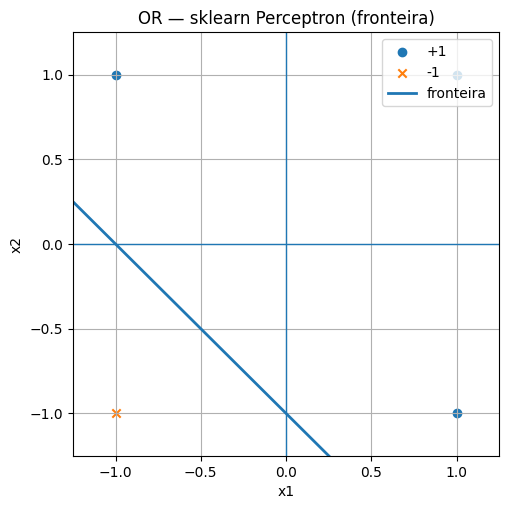


=== AND — sklearn Perceptron ===
Acurácia: 1.000
Matriz de confusão:
 [[3 0]
 [0 1]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

coef_ (w1, w2): [[1. 1.]]  | intercept_ (b): [-1.]


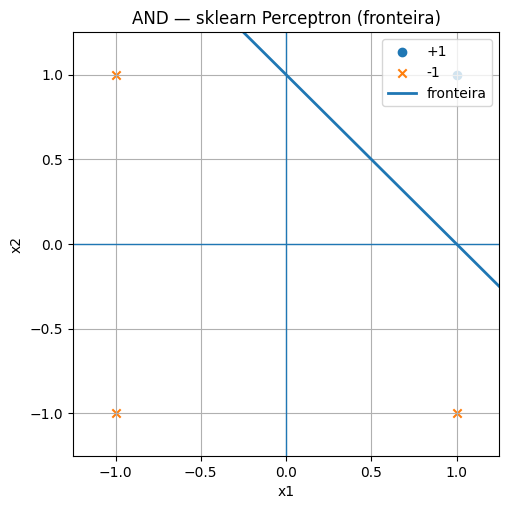

In [7]:
# ===== PASSO 6: sklearn Perceptron para OR e AND =====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reaproveitamos os dados do Passo 1, mas agora SEM o x3 (viés) explícito:
# O sklearn já trata o viés com intercepto (fit_intercept=True).
X_or_2d   = X_or[:, :2]     # (x1, x2)
X_and_2d  = X_and[:, :2]    # (x1, x2)
y_or_bin  = y_or            # {-1, +1}
y_and_bin = y_and           # {-1, +1}

def train_sklearn_perceptron(X, y, eta0=1.0, max_iter=1000, random_state=42):
    """
    Treina um Perceptron do sklearn com labels {-1, +1}.
    - eta0: taxa de aprendizado (learning rate inicial)
    - shuffle=True por padrão
    - early stopping implícito via tol (default: 1e-3); vamos desativar para ser mais "perceptron clássico".
    """
    model = Perceptron(
        penalty=None,
        alpha=0.0,
        fit_intercept=True,   # o sklearn cuida do viés (intercept_)
        max_iter=max_iter,
        tol=None,             # sem critério de parada por tolerância numérica
        shuffle=True,
        eta0=eta0,
        early_stopping=False,
        validation_fraction=0.1,
        n_iter_no_change=5,
        class_weight=None,
        warm_start=False,
        random_state=random_state
    )
    model.fit(X, y)
    return model

def plot_decision_boundary_sklearn(model, X, y, title="sklearn Perceptron — fronteira"):
    # grade 2D
    x_min, x_max = -1.25, 1.25
    y_min, y_max = -1.25, 1.25
    xx = np.linspace(x_min, x_max, 300)
    # fronteira: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
    w = model.coef_.ravel()
    b = model.intercept_[0]
    if abs(w[1]) < 1e-8:
        # fronteira ~ vertical: x1 = -b/w1
        x_line = np.full_like(xx, fill_value=(-b / w[0]))
        y_line = np.linspace(y_min, y_max, 300)
    else:
        x_line = xx
        y_line = -(w[0]*xx + b) / w[1]

    # separa classes
    X_pos = X[y == +1]
    X_neg = X[y == -1]

    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(X_pos[:,0], X_pos[:,1], marker='o', label='+1')
    plt.scatter(X_neg[:,0], X_neg[:,1], marker='x', label='-1')
    plt.plot(x_line, y_line, linewidth=2, label='fronteira')

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(0, linewidth=1)
    plt.axvline(0, linewidth=1)
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_and_show(model, X, y, name=""):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"\n=== {name} ===")
    print(f"Acurácia: {acc:.3f}")
    print("Matriz de confusão:\n", confusion_matrix(y, y_pred, labels=[-1, +1]))
    print(classification_report(y, y_pred, labels=[-1, +1]))
    print("coef_ (w1, w2):", np.round(model.coef_, 4), " | intercept_ (b):", np.round(model.intercept_, 4))

# ---------- Treinar e avaliar: OR ----------
perc_or = train_sklearn_perceptron(X_or_2d, y_or_bin, eta0=1.0, max_iter=1000, random_state=7)
evaluate_and_show(perc_or, X_or_2d, y_or_bin, name="OR — sklearn Perceptron")
plot_decision_boundary_sklearn(perc_or, X_or_2d, y_or_bin, title="OR — sklearn Perceptron (fronteira)")

# ---------- Treinar e avaliar: AND ----------
perc_and = train_sklearn_perceptron(X_and_2d, y_and_bin, eta0=1.0, max_iter=1000, random_state=7)
evaluate_and_show(perc_and, X_and_2d, y_and_bin, name="AND — sklearn Perceptron")
plot_decision_boundary_sklearn(perc_and, X_and_2d, y_and_bin, title="AND — sklearn Perceptron (fronteira)")



=== XOR — Perceptron (sklearn) ===
Acurácia: 0.5
Matriz de confusão:
 [[2 0]
 [2 0]]
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-3451469164.py:59: RuntimeWarni

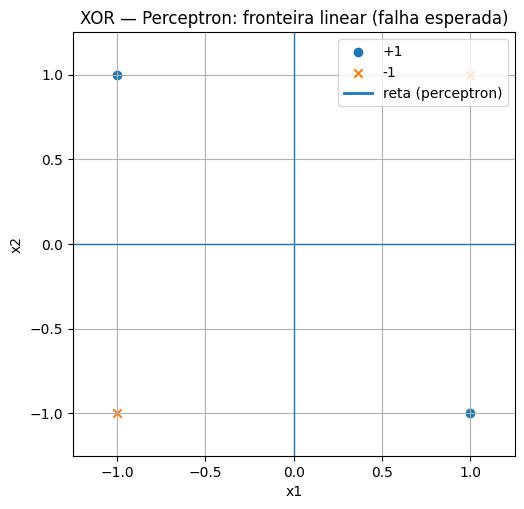


=== XOR — MLPClassifier (1 camada oculta) ===
Acurácia: 1.0
Matriz de confusão:
 [[2 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



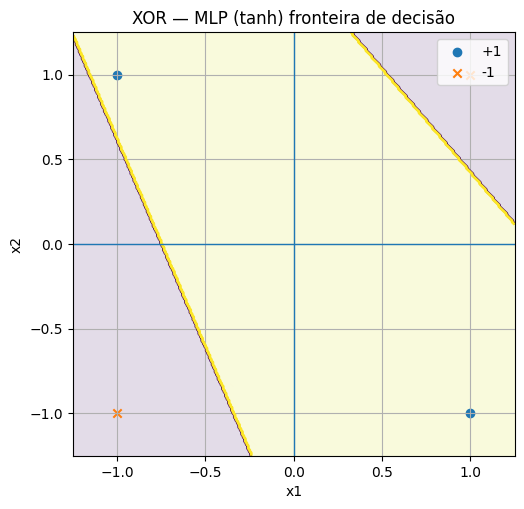

In [8]:
# ===== PASSO 7: XOR — Perceptron (falha) vs MLP (resolve) =====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset XOR em {-1, +1}
# Regra (bipolar): d=+1 quando x1 != x2; d=-1 quando x1 == x2
X_xor = np.array([
    [ 1,  1],
    [ 1, -1],
    [-1,  1],
    [-1, -1]
], dtype=float)
y_xor = np.array([-1, +1, +1, -1], dtype=int)

def plot_decision_boundary_model(model, X, y, title="Fronteira de decisão"):
    x_min, x_max = -1.25, 1.25
    y_min, y_max = -1.25, 1.25
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(5.7, 5.5))
    plt.contourf(xx, yy, Z, alpha=0.15)
    plt.contour(xx, yy, Z, levels=[-0.5, 0.5], linewidths=2)

    X_pos = X[y == +1]
    X_neg = X[y == -1]
    plt.scatter(X_pos[:,0], X_pos[:,1], marker='o', label='+1')
    plt.scatter(X_neg[:,0], X_neg[:,1], marker='x', label='-1')

    plt.title(title)
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max)
    plt.axhline(0, linewidth=1); plt.axvline(0, linewidth=1)
    plt.legend(); plt.grid(True); plt.show()

def show_metrics(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Matriz de confusão:\n", confusion_matrix(y_true, y_pred, labels=[-1, +1]))
    print(classification_report(y_true, y_pred, labels=[-1, +1]))

# 7A) Perceptron (sklearn) — deve falhar em separar XOR perfeitamente
perc_xor = Perceptron(tol=None, fit_intercept=True, eta0=1.0, max_iter=1000, random_state=7)
perc_xor.fit(X_xor, y_xor)
y_pred_perc = perc_xor.predict(X_xor)
show_metrics("XOR — Perceptron (sklearn)", y_xor, y_pred_perc)

# Fronteira (linear): visualize a impossibilidade
# Para visualização com Perceptron (reta): y = -(w1*x + b)/w2 quando w2 != 0
def plot_linear_boundary(model, X, y, title):
    w = model.coef_.ravel()
    b = model.intercept_[0]
    x_min, x_max = -1.25, 1.25
    xx = np.linspace(x_min, x_max, 300)
    if abs(w[1]) < 1e-8:
        x_line = np.full_like(xx, fill_value=(-b / w[0]))
        y_line = np.linspace(-1.25, 1.25, 300)
    else:
        x_line = xx
        y_line = -(w[0]*xx + b) / w[1]

    X_pos = X[y == +1]
    X_neg = X[y == -1]
    plt.figure(figsize=(5.7, 5.5))
    plt.scatter(X_pos[:,0], X_pos[:,1], marker='o', label='+1')
    plt.scatter(X_neg[:,0], X_neg[:,1], marker='x', label='-1')
    plt.plot(x_line, y_line, linewidth=2, label='reta (perceptron)')
    plt.title(title); plt.xlabel('x1'); plt.ylabel('x2')
    plt.xlim(x_min, x_max); plt.ylim(-1.25, 1.25)
    plt.axhline(0, linewidth=1); plt.axvline(0, linewidth=1)
    plt.legend(); plt.grid(True); plt.show()

plot_linear_boundary(perc_xor, X_xor, y_xor, "XOR — Perceptron: fronteira linear (falha esperada)")

# 7B) MLP (1 camada oculta) com ativação tanh — deve resolver
mlp_xor = MLPClassifier(
    hidden_layer_sizes=(2,),   # duas unidades na camada oculta
    activation='tanh',         # saída bip, combina bem com {-1,+1}
    solver='lbfgs',            # converge rápido em problemas pequenos
    alpha=0.0,
    max_iter=5000,
    random_state=7
)
mlp_xor.fit(X_xor, y_xor)
y_pred_mlp = mlp_xor.predict(X_xor)
show_metrics("XOR — MLPClassifier (1 camada oculta)", y_xor, y_pred_mlp)

# Visualizar fronteira não-linear aprendida
plot_decision_boundary_model(mlp_xor, X_xor, y_xor, "XOR — MLP (tanh) fronteira de decisão")

